In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import metrics
import seaborn as sn

In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin','bmi', 'pedigree', 'age', 'label']
data = pd.read_csv("C:\\Users\\ASUS\\Desktop\\PROJECTS_DS\\Machine-Learning-Projects\\SVM\\diabets.csv", header= None,names=col_names)
print(data.shape)
data.head()

(768, 9)


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.isnull().sum()

pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
label       0
dtype: int64

In [4]:
feature_cols = ['pregnant','insulin', 'bmi','age','glucose','bp', 'pedigree']
x=data[feature_cols]
y=data.label

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=5)
display(x_train.shape, y_train.shape, x_test.shape,y_test.shape)

(537, 7)

(537,)

(231, 7)

(231,)

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [7]:
model= SVC(kernel='rbf',random_state=0)
model.fit(x_train, y_train)
svc_prediction=model.predict(x_test)
print('svc_prediction: ', svc_prediction)

svc_prediction:  [0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 1
 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0
 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0
 1 1 0 0 1 0 0 0 1]


In [9]:
conf_mat=metrics.confusion_matrix(y_test, svc_prediction)
print('SVC [ kernerl - rbf ]')
print('Confusion Matrix : \n', conf_mat)
Accuracy_score=metrics.accuracy_score(y_test, svc_prediction)
print('Accuracy Score : ', Accuracy_score)
print('Accuracy in Percentage : ', int(Accuracy_score*100),'%')
print(classification_report(svc_prediction,y_test))

SVC [ kernerl - rbf ]
Confusion Matrix : 
 [[135  25]
 [ 22  49]]
Accuracy Score :  0.7965367965367965
Accuracy in Percentage :  79 %
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       157
           1       0.69      0.66      0.68        74

    accuracy                           0.80       231
   macro avg       0.77      0.76      0.76       231
weighted avg       0.79      0.80      0.80       231



[Text(0.5, 1.0, 'SVC [rbf]')]

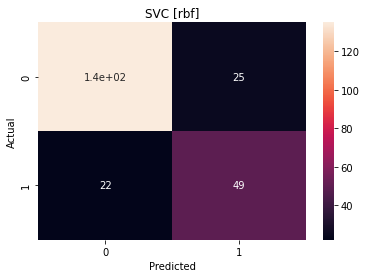

In [11]:
conf_mat=pd.crosstab(y_test, svc_prediction, rownames=['Actual'],colnames=['Predicted'])
sn.heatmap(conf_mat, annot=True).set(title='SVC [rbf]')

In [12]:
model= SVC(kernel='linear',random_state=0)
model.fit(x_train, y_train)
svc_prediction=model.predict(x_test)
print('svc_prediction: ', svc_prediction)

svc_prediction:  [0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 0 1
 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1
 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 1]


In [13]:
conf_mat=metrics.confusion_matrix(y_test, svc_prediction)
print('SVC [ kernerl - linear ]')
print('Confusion Matrix : \n', conf_mat)
Accuracy_score=metrics.accuracy_score(y_test, svc_prediction)
print('Accuracy Score : ', Accuracy_score)
print('Accuracy in Percentage : ', int(Accuracy_score*100),'%')
print(classification_report(svc_prediction,y_test))

SVC [ kernerl - linear ]
Confusion Matrix : 
 [[136  24]
 [ 23  48]]
Accuracy Score :  0.7965367965367965
Accuracy in Percentage :  79 %
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       159
           1       0.68      0.67      0.67        72

    accuracy                           0.80       231
   macro avg       0.76      0.76      0.76       231
weighted avg       0.80      0.80      0.80       231



[Text(0.5, 1.0, 'SVC [linear]')]

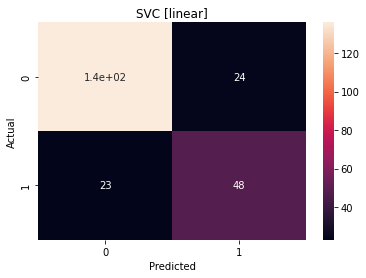

In [14]:
conf_mat=pd.crosstab(y_test,svc_prediction , rownames=['Actual'],colnames=['Predicted'])
sn.heatmap(conf_mat, annot=True).set(title='SVC [linear]')